# GRIP Task 1: Prediction Using Supervised ML

## Task Description

<b><i> A simple Linear Regression Machine Learning(ML) Model that will predict the percentage of marks that a student is expected to get given the no. of hours he or she studies per day. <br/>
Dataset Link - http://bit.ly/w-data
<b><i>

 ## Author : Gourav Nag

## Importing Libraries and Modules

In [57]:
# numpy for creation of numpy arrays and scientific computation
import numpy as np

# pandas for data frames and data manipulation
import pandas as pd

# matplotlib for plotting graphs and data visualization
import matplotlib.pyplot as plt

# train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Linear regression model for building and training the model
from sklearn.linear_model import LinearRegression

# r2 score and mean absolute error for model evaluation
from sklearn.metrics import r2_score, mean_absolute_error

print('Libraries and Modules are imported successfully !')

Libraries and Modules are imported successfully !


## Importing sample dataset and inspecting the data

In [58]:
# importing the data from the given link and creating a data frame object

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Dataset imported successfully !')

Dataset imported successfully !


In [59]:
# printing sample data

df.sample(5)

,Hours,Scores
0,2.5,21
1,5.1,47
22,3.8,35
9,2.7,25
20,2.7,30


In [60]:
# viewing the shape of the data frame object

df.shape

(25, 2)

In [61]:
# viewing the information about the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [62]:
# counting null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [63]:
# viewing statistical information

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

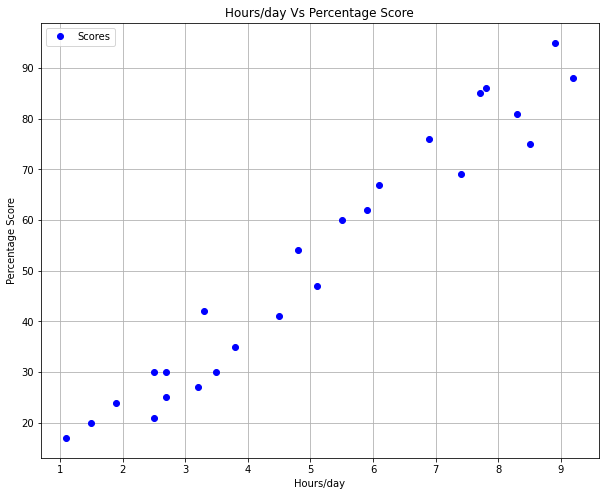

In [64]:
# plotting the distributions of Hours and Scores and finding the relationship between them

df.plot(x = 'Hours', y = 'Scores', style = 'o', figsize = (10, 8), color = 'blue')
plt.xlabel('Hours/day')
plt.ylabel('Percentage Score')
plt.title('Hours/day Vs Percentage Score')
plt.grid()
plt.show()

<b>So, We can clearly see that their exist a positive linear relationship between the no. of hours that a student studies per day and the percentage score.<b>

## Data Splitting and Preparation

In [65]:
# preparing the data for independant and dependant variables

X = df.iloc[: , : -1].values # independant variable containing all rows of all the columns except the last column
y = df.iloc[: , 1].values # dependant variable containing all rows of only the last column

In [66]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)
print('Data splitting completed successfully !')

Data splitting completed successfully !


## Model Training

In [67]:
# training the linear regression model

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Model training completed successfully !')

Model training completed successfully !


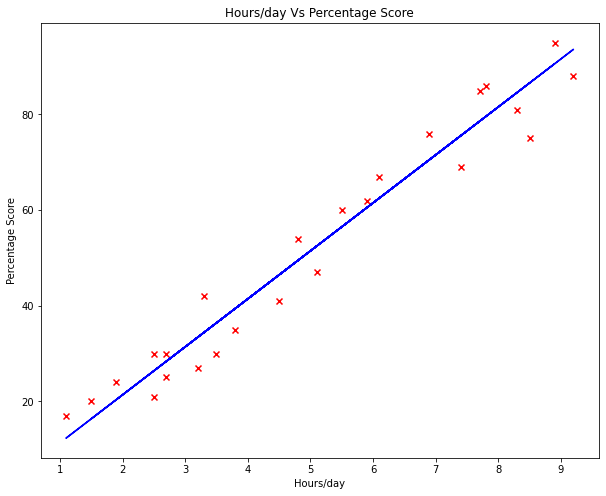

In [68]:
# plotting the regression line

# equation of linear regression : y = mx + c
regr_line = lr.coef_ * X + lr.intercept_

plt.figure(figsize = (10, 8))
plt.scatter(X, y, marker = 'x', color = 'red')
plt.plot(X, regr_line, color = 'blue')
plt.xlabel('Hours/day')
plt.ylabel('Percentage Score')
plt.title('Hours/day Vs Percentage Score')
plt.show()

## Model Prediction

In [69]:
# compairing the actual and the predicted value

y_predicted = lr.predict(X)
y_compare = pd.DataFrame({'y_actual': y, 'y_predicted': y_predicted})
y_compare.head()

,y_actual,y_predicted
0,21,26.381122
1,47,52.470463
2,27,33.405176
3,75,86.587294
4,30,36.415484


In [70]:
# model prediction

hours = np.array(9.25).reshape(1, -1)
score_pred = lr.predict(hours)
print('Model Predictions:')
print('----- ------------\n')
print('No. of hours/day: {}'.format(hours[0][0]))
print('Predicted Percentage Score: {}'.format(score_pred[0]))

Model Predictions:
----- ------------

No. of hours/day: 9.25
Predicted Percentage Score: 94.11306590841731


## Model Performance and Evaluation

In [71]:
# model accuracy

y_pred = lr.predict(X_test)
model_accuracy = r2_score(y_test, y_pred)
model_error = mean_absolute_error(y_test, y_pred)
print('Model Performance:')
print('----- ------------\n')
print('R2 Score: {}'.format(model_accuracy * 100))
print('Mean Absolute Error(MAE): {}'.format(model_error))

Model Performance:
----- ------------

R2 Score: 97.21254393805228
Mean Absolute Error(MAE): 4.824737422199172
